In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv',nrows=20000)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [2]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 1 to 19995
Data columns (total 18 columns):
Date received                   4260 non-null object
Product                         4260 non-null object
Sub-product                     2901 non-null object
Issue                           4260 non-null object
Sub-issue                       2169 non-null object
Consumer complaint narrative    4260 non-null object
Company public response         2091 non-null object
Company                         4260 non-null object
State                           4247 non-null object
ZIP code                        4247 non-null object
Tags                            714 non-null object
Consumer consent provided?      4260 non-null object
Submitted via                   4260 non-null object
Date sent to company            4260 non-null object
Company response to consumer    4260 non-null object
Timely response?                4260 non-null object
Consumer disputed?              4201 non-null

In [4]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [5]:
df.columns


Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [6]:
df.columns = ['Product', 'Consumer_complaint_narrative']


In [7]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [8]:
df.head()


,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)



In [10]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


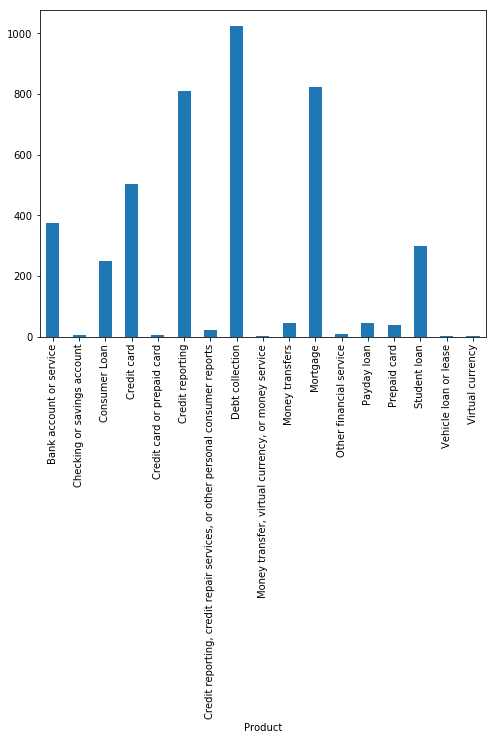

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
tfidf = TfidfVectorizer(sublinear_tf=True, encoding='latin-1', ngram_range=(1, 2), stop_words='english')


In [14]:

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()


In [15]:
tfidf.vocabulary_

{'outdated': 125943,
 'information': 92369,
 'credit': 49570,
 'report': 152361,
 'previously': 137646,
 'disputed': 61465,
 'removed': 151147,
 'seven': 166487,
 'years': 201943,
 'old': 123937,
 'does': 62968,
 'meet': 112195,
 'reporting': 153355,
 'requirements': 155612,
 'outdated information': 125948,
 'information credit': 92568,
 'credit report': 50131,
 'report previously': 152886,
 'previously disputed': 137668,
 'disputed removed': 61584,
 'removed information': 151273,
 'information seven': 93031,
 'seven years': 166497,
 'years old': 202243,
 'old does': 123979,
 'does meet': 63102,
 'meet credit': 112202,
 'credit reporting': 50133,
 'reporting requirements': 153574,
 'purchased': 142682,
 'new': 119597,
 'car': 30729,
 'xxxx': 197642,
 'dealer': 53608,
 'called': 28956,
 'citizens': 37047,
 'bank': 22319,
 '10': 1219,
 'day': 52674,
 'payoff': 131793,
 'loan': 105894,
 'good': 81820,
 'till': 180527,
 'sent': 164246,
 'check': 35678,
 'balanced': 22208,
 'checkbook': 361

In [16]:
labels = df.category_id
features.shape

(4260, 202696)

In [17]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . bank
       . overdraft
  . Most correlated bigrams:
       . overdraft fees
       . checking account
# 'Checking or savings account':
  . Most correlated unigrams:
       . comma
       . prevention
  . Most correlated bigrams:
       . data files
       . month limitation
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . xxxx vehicle
       . toyota financial
# 'Credit card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . annual fee
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . horrendously
       . reactivating
  . Most correlated bigrams:
       . dollars says
       . says xxxx
# 'Credit reporting':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . verify accounts
       . credit report
# 'Credit repo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)



In [19]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [20]:
print(clf.predict_proba(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

[[  1.64166401e-13   1.56731759e-28   9.19207880e-15   1.15600578e-10
    1.81760474e-28   1.96223832e-04   2.69309430e-26   9.99803714e-01
    4.50085349e-30   1.27175739e-23   6.25142155e-08   7.40202346e-29
    3.22638920e-23   3.78036569e-25   2.84949894e-13   7.09875712e-30]]


In [21]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting']


In [22]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
12,Debt collection,This company refuses to provide me verificatio...,2


In [23]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id
61,Credit reporting,I am disputing the inaccurate information the ...,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/vsonone/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/vsonone/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/vsonone/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/vsonone/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only

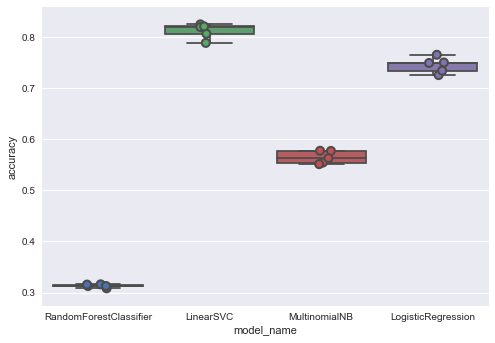

In [25]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [26]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.812168
LogisticRegression        0.745040
MultinomialNB             0.564753
RandomForestClassifier    0.313147
Name: accuracy, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [29]:
X_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02751724,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02763332,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
y_train

19475    2
9229     0
6507     0
712      2
4067     4
16963    3
12230    0
17424    0
14828    0
19032    2
9455     2
13391    2
17519    2
6732     2
12018    4
1607     0
10033    0
13607    7
2553     4
9062     4
15675    2
1045     0
178      3
14860    9
19834    1
10299    1
18612    3
1091     2
7172     3
6433     0
        ..
10843    7
3327     4
2548     3
12955    4
15670    6
1943     4
15122    2
3076     2
3699     6
3518     7
9483     8
443      2
11851    8
8824     2
9683     7
10220    4
13663    3
2513     0
8090     7
13687    6
10457    0
10069    6
12296    2
3297     3
16422    0
4892     2
15352    0
7853     2
12347    3
12910    2
Name: category_id, dtype: int64

In [31]:
y_test

6264      2
3797      0
3684      3
18931     7
8671      8
5232      6
18065     7
9790      7
5291     11
15311     0
13750     0
6000      2
4693      2
13464     2
18560     2
3591      2
17131     3
6864      2
10210     2
13777     0
18738     8
3914      3
3579      7
6203      4
9232      4
18694     6
3876      0
16890     2
15900     4
5238      2
         ..
11363     2
10927     2
10502     6
17183     0
8634      2
17179     0
19277     3
36        4
12445     6
13380     4
16667     2
2879      2
18551     0
6242      0
14479     3
300       2
154       1
14843    12
6032      6
19612     2
3927     10
10996     6
19244     2
1358      9
17500     2
10089     0
8115      2
11688     2
6079      3
17221     3
Name: category_id, dtype: int64

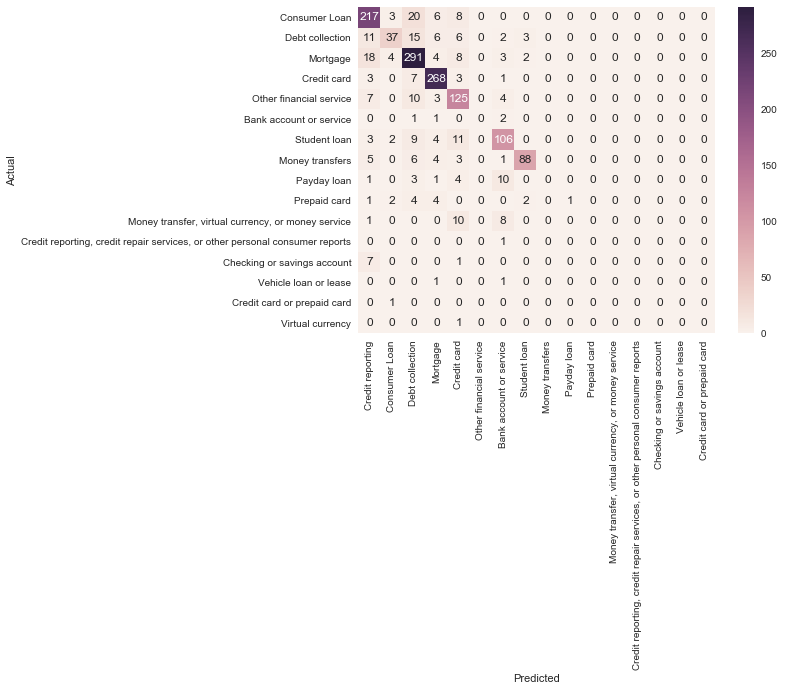

In [32]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
from IPython.display import display

# for predicted in category_id_df.category_id:
#     for actual in category_id_df.category_id:
#         if predicted != actual and conf_mat[actual, predicted] >= 6:
#             print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
#             display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
#             print('')

In [34]:
model.fit(features, labels)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [35]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . account
  . Top bigrams:
       . checking account
       . debit card
# 'Checking or savings account':
  . Top unigrams:
       . 2018
       . bonus
  . Top bigrams:
       . xx 2018
       . 00 bonus
# 'Consumer Loan':
  . Top unigrams:
       . vehicle
       . car
  . Top bigrams:
       . paid loan
       . supposed removed
# 'Credit card':
  . Top unigrams:
       . card
       . discover
  . Top bigrams:
       . credit card
       . american express
# 'Credit card or prepaid card':
  . Top unigrams:
       . gift
       . cents
  . Top bigrams:
       . dollars says
       . says xxxx
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . transunion
  . Top bigrams:
       . xxxx account
       . xxxx xxxx
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . recognize
       . dont
  . Top bigrams:
       . companies dont
       . dont accoun

In [36]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Mortgage'

"I can't get the money out of the country."
  - Predicted as: 'Bank account or service'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Bank account or service'



In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))
 

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.79      0.85      0.82       254
                                                               Consumer Loan       0.76      0.46      0.57        80
                                                             Debt collection       0.80      0.88      0.84       330
                                                                    Mortgage       0.89      0.95      0.92       282
                                                                 Credit card       0.69      0.84      0.76       149
                                                     Other financial service       0.00      0.00      0.00         4
                                                     Bank account or service       0.76      0.79      0.77       135
                                                       

/Users/vsonone/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
